В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

## Задание
1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4. Проанализируйте CTR с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.

## Описание данных
* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы


## 1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

**Сколько уникальных рекламных кампаний было проведено?**

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

%matplotlib inline

In [5]:
df = pd.read_csv('data/conversion.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
df.shape

(1143, 11)

In [7]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [10]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [15]:
df.nunique() #3 рекламные компании

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [19]:
df.xyz_campaign_id.value_counts()

xyz_campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64

In [20]:
df.age.value_counts()

age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

In [21]:
df.gender.value_counts()

gender
M    592
F    551
Name: count, dtype: int64

Ответ: `3`

## Задание 2

**Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.**



In [26]:
df.info()

#gender - номин
#age - ранг

#int - дискр
#кроме #id все номин(?) id оно как имя
#и interest
#float - непр

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


clicks - **Дискретная**			
gender - **Номинативная**			
total_conversion				
spent - **Непрерывная**				
interest - **Номинативная**			
age - **Ранговая/порядковая**			
approved_conversion	- **Дискретная**			
impressions - **Дискретная**	

## Задание 3

**Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:**

Hint: np.log()

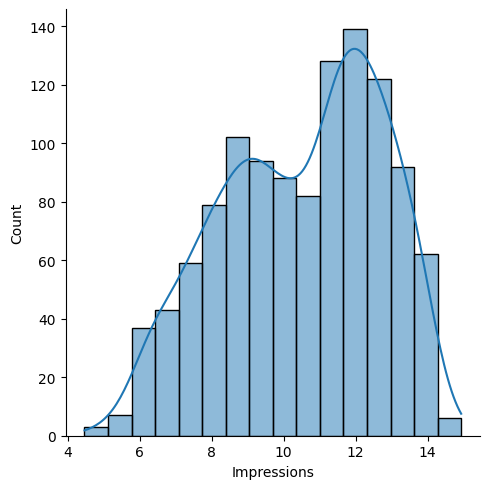

In [54]:
sns.displot(df.groupby('fb_campaign_id').Impressions.apply(np.log), kde='True')

* Распределение унимодальное
* **Распределение бимодальное**
* **Полученное распределение не является нормальным**
* Распределение симметричное
* Полученное распределение является нормальным

## Задание 4

**Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.**

CTR= clicks / impressions

**Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.**

In [99]:
df['CTR'] = df.Clicks/df.Impressions
df.CTR.describe()


count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [66]:
#sns.displot(df.CTR)
df[df.CTR==df.CTR.max()].ad_id

150    738637
Name: ad_id, dtype: int64

Ответ: `738637`


## Задание 5

**Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?**

![](https://storage.yandexcloud.net/klms-public/production/learning-content/11/79/614/1768/8104/dfdfd.png)

In [115]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

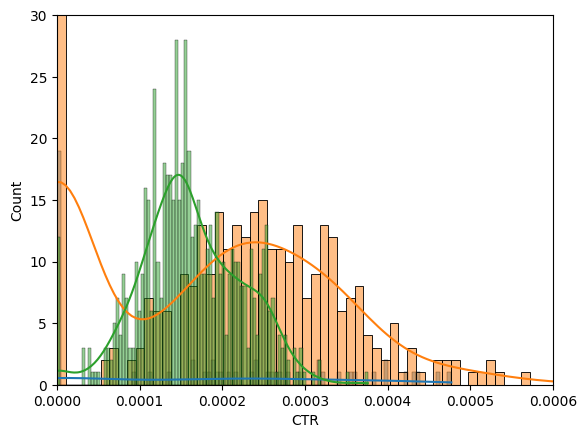

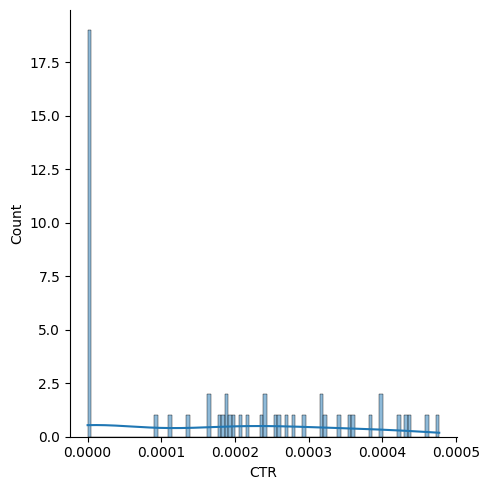

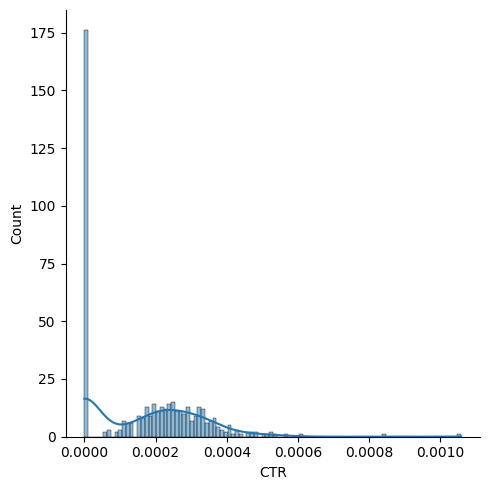

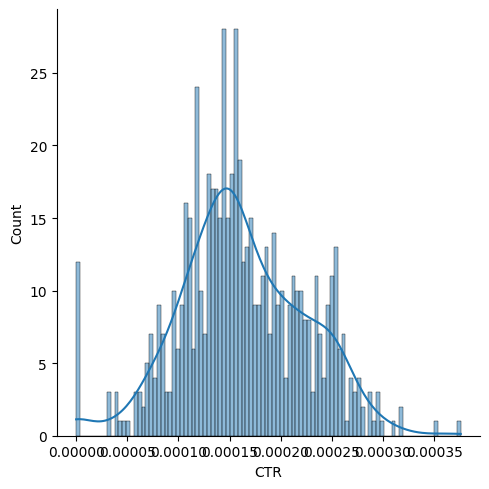

In [114]:
fig, ax= plt.subplots()
plt.xlim(0, 0.0006)
plt.ylim(0, 30)
for id in df.xyz_campaign_id.unique():
    sns.histplot(df.query('xyz_campaign_id==@id').CTR, kde='True', bins=100)
for id in df.xyz_campaign_id.unique():
    sns.displot(df.query('xyz_campaign_id==@id').CTR, kde='True', bins=100)

* **С**
* А
* В


## Задание 6

**CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:**

CPC= spent / clicks

**Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.**

**Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().**

In [147]:
df['CPC'] = df['Spent']/df['Clicks']
df.CPC.describe() #dropna() даж не нужно

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

<Axes: xlabel='CPC', ylabel='Count'>

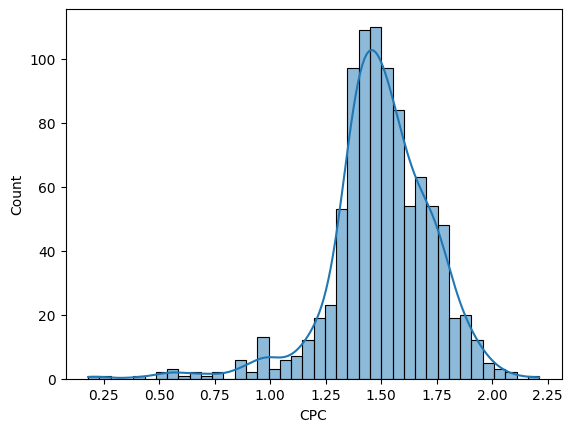

In [140]:
fig, ax = plt
sns.histplot(df.CPC, kde=True)

In [153]:
#round(df.CPC.quantile(0.75)-df.CPC.quantile(0.25),2)
round(ss.iqr(df.CPC.dropna()), 2)
#ss.iqr(df.CPC,nan_policy='omit')

0.25

Ответ: `0.25`


## Задание 7

**Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?**

![](https://storage.yandexcloud.net/klms-public/production/learning-content/11/79/614/1768/8106/fdgshed.png)

<Axes: xlabel='CPC', ylabel='Count'>

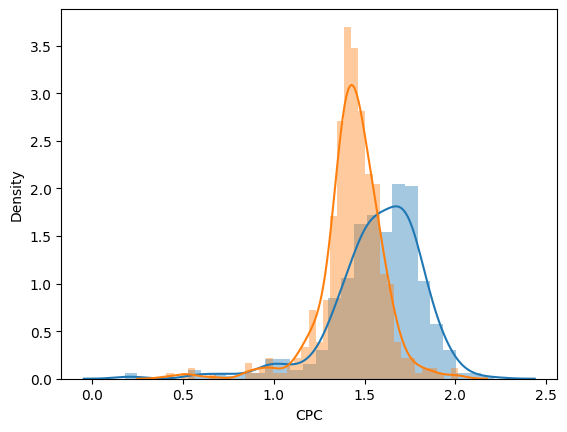

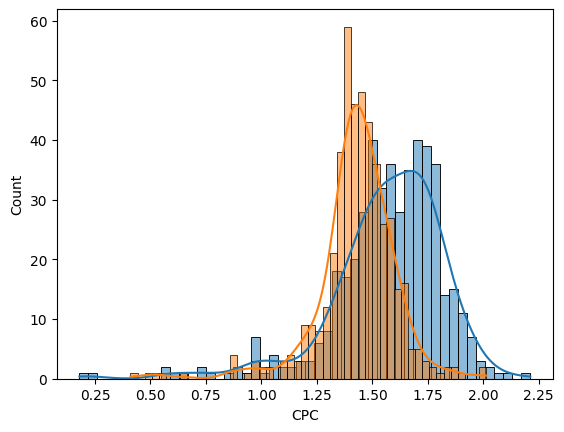

In [171]:
import warnings
warnings.filterwarnings('ignore')

fig, ax= plt.subplots()
sns.distplot(df[df.gender=='M'].CPC, kde=True, ax=ax)
sns.distplot(df[df.gender=='F'].CPC, kde=True, ax=ax)

warnings.resetwarnings()

fig, ax= plt.subplots()
sns.histplot(df[df.gender=='M'].CPC, kde=True, ax=ax, bins=50)
sns.histplot(df[df.gender=='F'].CPC, kde=True, ax=ax, bins=50)

* D
* A
* **B**
* C


## Задание 8

**Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.**

**Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.**

Note: клики – Clicks, покупки – Approved_Conversion.

In [175]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [182]:
#conv click -> purchase
df['CR'] = df.Approved_Conversion/df.Clicks*100
df[df.ad_id==1121814].CR.round(2)

860    3.09
Name: CR, dtype: float64

Ответ: `3.09`